In [18]:
import cv2
import numpy as np
from cv2 import VideoWriter, VideoWriter_fourcc
from pdb import set_trace
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from pdb import set_trace

In [19]:
def GenerateData():
    width = 64
    height = 64
    seconds = 10
    radius = 1
    paint_h = int(height/2)
    VideoData = []

    #Design the testing data
    for paint_x in range(-radius, width+radius+1, 1):
        frame = 255*np.ones( 
                       (height, width), 
                                  dtype=np.double)
        cv2.circle(frame, (paint_x, paint_h), radius, (0, 0), -1)
        VideoData.append(frame)

    VideoTrain = np.stack(VideoData, axis=0)

    for paint_x in range(-radius, width+radius+1, 2):
        frame = 255*np.ones( 
                       (height, width), 
                                  dtype=np.double)
        cv2.circle(frame, (paint_x, paint_h), radius, (0, 0), -1)
        VideoData.append(frame)

    VideoTest = np.stack(VideoData, axis=0)

    return torch.tensor(VideoTrain,dtype=torch.float), torch.tensor(VideoTest,dtype=torch.float)

67
101
5
tensor([0., 0., 0., 0., 0.])


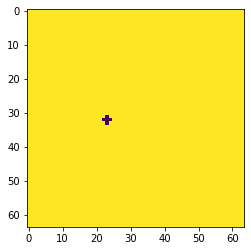

In [20]:
VideoTrain, VideoTest = GenerateData()
index = 50
print(VideoTrain.shape[0])
print(VideoTest.shape[0])
print(len(VideoTrain[index,VideoTrain[index]==0]))
print(VideoTrain[index,VideoTrain[index,:,:]==0])
plt.imshow(VideoTrain[24,:,:])
plt.show()

In [21]:
#Define the architecture for the RNN
class RNN(nn.Module):
    def __init__(self, dt, height, width, frames):
        super(RNN, self).__init__()
        self.dt = dt
        self.height = height
        self.width = width
        self.W = nn.Parameter(255*torch.ones(frames, height, width))
        self.b = nn.Parameter(255*torch.ones(frames, height, width))
        
    def forward(self,X):
        # Make the dynamics here
        # Extract the image of the object
        # Define the parameters for the new position
        # Predict the object there
        frames = X.shape[0]-1
        output = []
        for i in range(frames):
            #Extract the indices of the object
            param = torch.matmul(self.W[i], X[i]) + self.b[i]
            newframe = X[i] + self.dt*param
            output.append(newframe)
           
        return torch.stack(output, axis=0)

In [22]:
rnn = RNN(1/24, 64,64, 66)
optimizer = torch.optim.Adam(rnn.parameters(), lr=1e-1)
n_epochs = 10000
Truedat = VideoTrain[1:]
delay = 5
lossfn = nn.MSELoss()

In [23]:
for i in range(n_epochs):
    output = rnn(VideoTrain)
    loss = lossfn(output, Truedat)
    if (i%delay == 0):
        print(loss.item())
    loss.backward()
    optimizer.step()

30001293312.0
29887207424.0
29770070016.0
29645910016.0
29514713088.0
29377142784.0
29233729536.0
29085372416.0
28932540416.0
28776134656.0
28616603648.0
28454449152.0
28290174976.0
28124205056.0
27956754432.0
27788199936.0
27618682880.0
27448465408.0
27277719552.0
27106574336.0
26935042048.0
26763440128.0
26591645696.0
26419873792.0
26248214528.0
26076575744.0
25905162240.0
25733849088.0
25562935296.0
25392248832.0
25221892096.0
25051895808.0
24882288640.0
24713076736.0
24544344064.0
24375994368.0
24208121856.0
24040767488.0
23873945600.0
23707590656.0
23541768192.0
23376494592.0
23211728896.0
23047606272.0
22883977216.0
22721005568.0
22558507008.0
22396704768.0
22235435008.0
22074820608.0
21914810368.0
21755402240.0
21596583936.0
21438394368.0
21280866304.0
21123979264.0
20967710720.0
20812109824.0
20657121280.0
20502773760.0
20349024256.0
20195995648.0
20043628544.0
19891853312.0
19740743680.0
19590340608.0
19440551936.0
19291406336.0
19142938624.0
18995177472.0
18847991808.0
187015

8081116160.0
8123045376.0
8164955648.0
8206783488.0
8248540672.0
8290252800.0
8331896320.0
8373463040.0
8414957568.0
8456380416.0
8497747456.0
8539032064.0
8580221440.0
8621346816.0
8662384640.0
8703338496.0
8744211456.0
8784980992.0
8825664512.0
8866258944.0
8906779648.0
8947177472.0
8987470848.0
9027673088.0
9067771904.0
9107760128.0
9147613184.0
9187382272.0
9227045888.0
9266577408.0
9305995264.0
9345293312.0
9384471552.0
9423528960.0
9462466560.0
9501256704.0
9539928064.0
9578449920.0
9616843776.0
9655110656.0
9693205504.0
9731192832.0
9769009152.0
9806684160.0
9844217856.0
9881600000.0
9918801920.0
9955873792.0
9992774656.0
10029505536.0
10066079744.0
10102467584.0
10138695680.0
10174753792.0
10210644992.0
10246343680.0
10281851904.0
10317207552.0
10352360448.0
10387316736.0
10422092800.0
10456670208.0
10491059200.0
10525258752.0
10559227904.0
10593012736.0
10626586624.0
10659958784.0
10693099520.0
10726037504.0
10758760448.0
10791272448.0
10823549952.0
10855609344.0
10887426048.0

KeyboardInterrupt: 

(64, 64)
[[14838.932 14838.932 14838.932 ... 14838.932 14838.932 14838.932]
 [14838.932 14838.932 14838.932 ... 14838.932 14838.932 14838.932]
 [14838.932 14838.932 14838.932 ... 14838.932 14838.932 14838.932]
 ...
 [14838.932 14838.932 14838.932 ... 14838.932 14838.932 14838.932]
 [14838.932 14838.932 14838.932 ... 14838.932 14838.932 14838.932]
 [14838.932 14838.932 14838.932 ... 14838.932 14838.932 14838.932]]


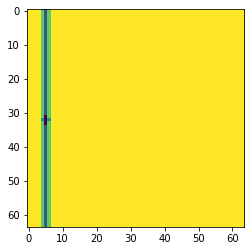

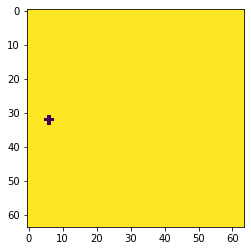

[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


In [24]:
index=6
print(output.detach().numpy()[index].shape)
print(output.detach().numpy()[index])
plt.imshow(output.detach().numpy()[index])
plt.show()
plt.imshow(Truedat.detach().numpy()[index])
plt.show()
print(Truedat.detach().numpy()[index])

In [25]:
print(list(rnn.parameters())[1].shape)

torch.Size([66, 64, 64])


In [16]:
size = (64,64)
out = cv2.VideoWriter('project.avi',cv2.VideoWriter_fourcc(*'MP42'),1 , size)
print(len(output))
for i in range(len(output)):
    
    out.write((output[i].detach().numpy()*255).astype(np.uint8))
out.release()

66


In [17]:
print(optimizer.param_groups[0]['params'][2].shape)

IndexError: list index out of range